<a href="https://colab.research.google.com/github/zubaidak/Summer-Microcredential-Data-Analytics-/blob/main/Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

The aim for this analysis is to project the classification of survived vs. not-survived in the Titanic

# Task 2: Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly               # graphing library 
import cufflinks as cf

cf.go_offline()             #we not using plotly for profit


# Task 3: Load the Data

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/zubaidak/ML-data/main/titanic_train.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull()
# shows the empty values in our data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

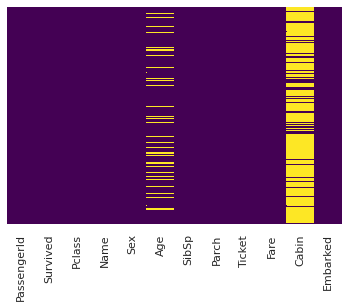

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# cmap is color pallette from seaborn

As we can see, roughly 20% of the age data is missing. Therefore, the proportion of Age missing is likely small enough for reasonable replacement with some form of inputation. If we look at the Cabin column, we can see that we are missing too much data to progress further.

In [9]:
def inpute_age(cols):
    #defining a function to do
    Age = cols[0]

    Pclass = cols[1]
    
    if pd.isnull(Age): 
        #if there is missing value for Age
        if Pclass == 1:    # If it is the first class, return 37
            return 37
        elif Pclass == 2:  #second class, return 29
            return 29
        else:              # the 3rd class, return 24,  no elif because that last remaining class
            return 24
    else:
            return Age


In [10]:
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)
# assigning value, but not to a new variable
# apply allows to assess and manipulate the column or database at the same time

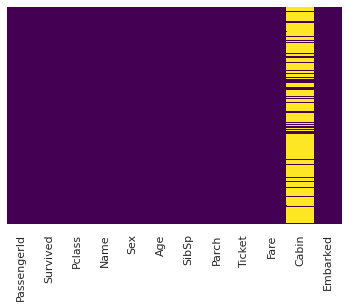

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
train.isnull()
# All age are filled in now, as shown in the table below everything is False for Age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
train.drop('Cabin', axis=1, inplace=True)
# .drop will drop cabin info
# axis 1 is the column
# inplace makes it permanent, from this point on

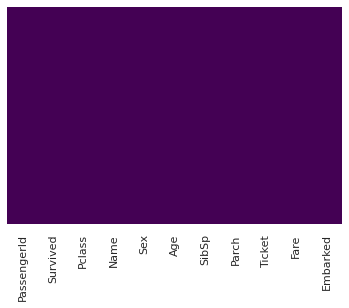

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
train.dropna(inplace=True)
# whatever data is still missing will be dropped

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Given the state of our dataset, we might need to convert categorical features to dummy variables using Pandas. If we don't, then our ML model will not be able to directly take in those features as inputs!!


In [17]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [21]:
train = pd.concat([train, sex, embark], axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Task 5: Data Visualization

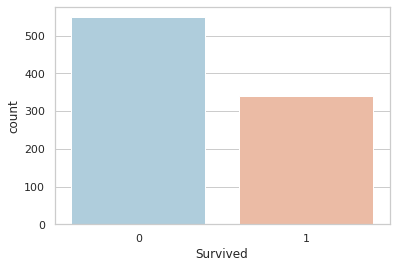

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

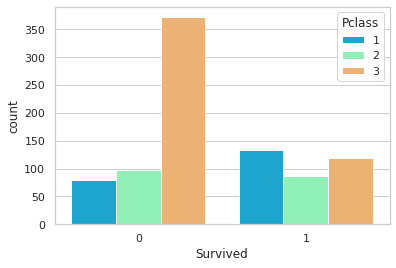

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

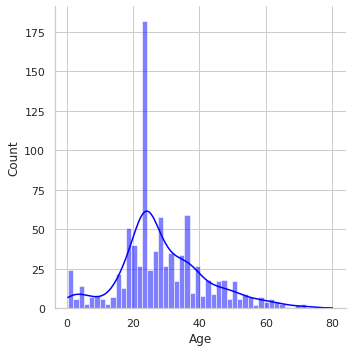

In [25]:
sns.displot(train['Age'].dropna(), kde=True, color='blue', bins=50)

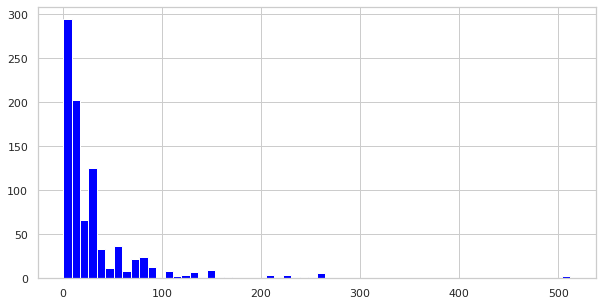

In [26]:
train['Fare'].hist(color='blue', bins=60, figsize=(10,5))

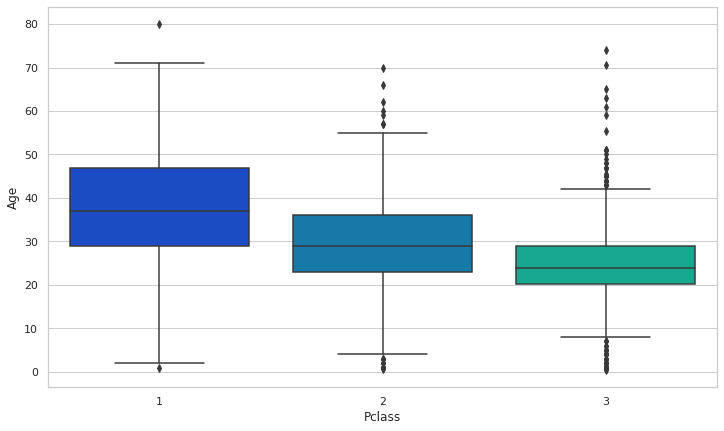

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
# the box shows the age of people who bought tickets in their specific class

Since we can deterimine that people in higher classes tend to be older we can then use these to average age values and input according to Pclass for age.

# Task 6: Compute the cost Function

In [28]:
# This analysis does not require it.

# Task 7: Compute the Gradient Descent

In [29]:
# This analysis does not require it.

# Task 8: Perfom Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

# Task 9: Conduct the Logistic Regression on the Data

### Import the adequate model

In [32]:
from sklearn.linear_model import LogisticRegression

### Create the model by assigning a variable the class pertaining to the model selected.

In [33]:
logmodel = LogisticRegression()

### Train the Model created by using the `fit` method

In [34]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### Evaluate the model

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



# Task 10: Making Predictions

In [39]:
print(logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
print('Survived: ', sum(pp!=0))
# if not zero, they survived
print('Not Survive: ', sum(pp==0))
# if zero, they didnt survive

0.8014981273408239
Survived:  79
Not Survive:  188
